In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
base = "CME"
threshold = 3.5

In [3]:
Comparison = pd.read_csv(f"{base} Base Output/DetectionComparison.csv")
if base == "CME":
    sec = "Dino"
if base == "Dino":
    sec = "CME"

In [4]:
M_comp = Comparison.to_numpy()
t_vec = defaultdict(list)

for t in M_comp:
    t_vec[t[0]].append(t)

for t_val in t_vec:
    t_vec[t_val] = np.array(t_vec[t_val]) 

t_list = np.zeros((len(t_vec),3), dtype=object)

In [5]:
for i, t in enumerate(t_vec):
    t_val = t_vec[t]
    counts = len((t_val[:,11]))
    true_counts = (np.sum(t_val[:,11] < threshold))
    t_list[i][0] = int(t)
    t_list[i][1] = counts
    t_list[i][2] = true_counts

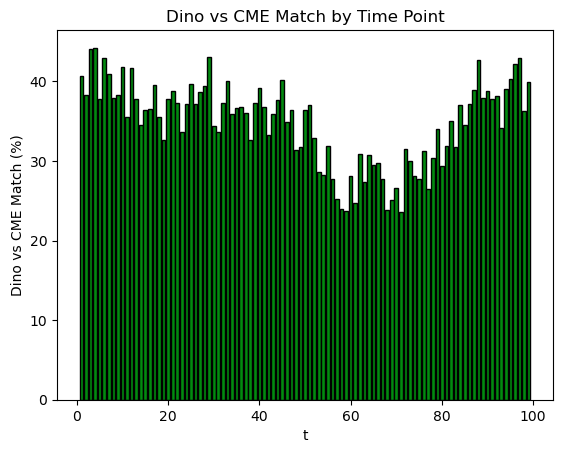

<Figure size 640x480 with 0 Axes>

In [6]:
plt.bar(t_list[:,0], 100*t_list[:,2]/t_list[:,1], color="#028A0F", edgecolor = "black")
plt.xlabel("t")
plt.ylabel(f"{base} vs {sec} Match (%)")
plt.title(f"{base} vs {sec} Match by Time Point")
plt.show()
plt.savefig(f"{base} Base Plots/CME vs Dino Match by Time Point.png")

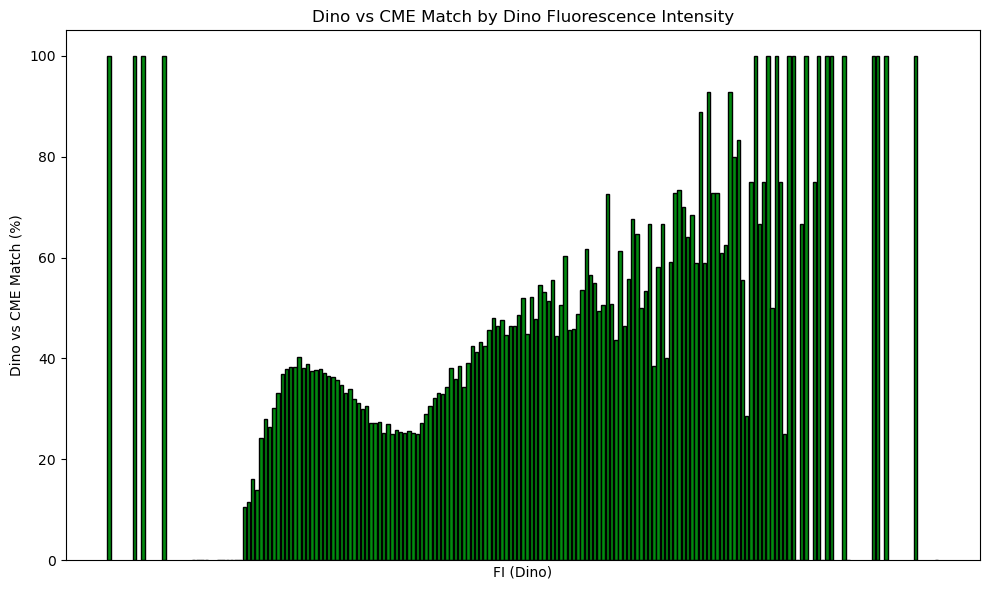

<Figure size 640x480 with 0 Axes>

In [7]:
bins = np.linspace(Comparison[f"FI ({base})"].min(), Comparison[f"FI ({base})"].max(), 200)

Comparison[f"FI_bin"] = pd.cut(Comparison[f"FI ({base})"], bins)

total_per_bin = Comparison.groupby("FI_bin",observed =False).size()

matches_per_bin = Comparison[Comparison["Distance"] < threshold].groupby("FI_bin",observed=False).size()

interval_labels = [f"{round(bins[i],1)}–{round(bins[i+1],1)}" for i in range(len(bins)-1)]

fraction = (matches_per_bin / total_per_bin).values

plt.figure(figsize=(10, 6))
plt.bar(interval_labels,100*fraction, color = "#028A0F",edgecolor="black")
plt.xlabel(f"FI ({base})")
#plt.xticks(rotation=45, ha="right")
plt.xticks([])
plt.ylabel(f"{base} vs {sec} Match (%)")
plt.title(f"{base} vs {sec} Match by {base} Fluorescence Intensity")
plt.tight_layout()
plt.show()
plt.savefig(f"{base} Base Plots/Match by FI.png")